# Day 17

- [https://adventofcode.com/2019/day/17](https://adventofcode.com/2019/day/17)

```text
--- Day 17: Set and Forget ---

An early warning system detects an incoming solar flare and automatically activates the ship's electromagnetic shield. Unfortunately, this has cut off the Wi-Fi for many small robots that, unaware of the impending danger, are now trapped on exterior scaffolding on the unsafe side of the shield. To rescue them, you'll have to act quickly!

The only tools at your disposal are some wired cameras and a small vacuum robot currently asleep at its charging station. The video quality is poor, but the vacuum robot has a needlessly bright LED that makes it easy to spot no matter where it is.

An Intcode program, the Aft Scaffolding Control and Information Interface (ASCII, your puzzle input), provides access to the cameras and the vacuum robot. Currently, because the vacuum robot is asleep, you can only access the cameras.

Running the ASCII program on your Intcode computer will provide the current view of the scaffolds. This is output, purely coincidentally, as ASCII code: 35 means #, 46 means ., 10 starts a new line of output below the current one, and so on. (Within a line, characters are drawn left-to-right.)

In the camera output, # represents a scaffold and . represents open space. The vacuum robot is visible as ^, v, <, or > depending on whether it is facing up, down, left, or right respectively. When drawn like this, the vacuum robot is always on a scaffold; if the vacuum robot ever walks off of a scaffold and begins tumbling through space uncontrollably, it will instead be visible as X.

In general, the scaffold forms a path, but it sometimes loops back onto itself. For example, suppose you can see the following view from the cameras:

..#..........
..#..........
#######...###
#.#...#...#.#
#############
..#...#...#..
..#####...^..

Here, the vacuum robot, ^ is facing up and sitting at one end of the scaffold near the bottom-right of the image. The scaffold continues up, loops across itself several times, and ends at the top-left of the image.

The first step is to calibrate the cameras by getting the alignment parameters of some well-defined points. Locate all scaffold intersections; for each, its alignment parameter is the distance between its left edge and the left edge of the view multiplied by the distance between its top edge and the top edge of the view. Here, the intersections from the above image are marked O:

..#..........
..#..........
##O####...###
#.#...#...#.#
##O###O###O##
..#...#...#..
..#####...^..

For these intersections:

    The top-left intersection is 2 units from the left of the image and 2 units from the top of the image, so its alignment parameter is 2 * 2 = 4.
    The bottom-left intersection is 2 units from the left and 4 units from the top, so its alignment parameter is 2 * 4 = 8.
    The bottom-middle intersection is 6 from the left and 4 from the top, so its alignment parameter is 24.
    The bottom-right intersection's alignment parameter is 40.

To calibrate the cameras, you need the sum of the alignment parameters. In the above example, this is 76.

Run your ASCII program. What is the sum of the alignment parameters for the scaffold intersections?
```

In [1]:
# Python imports
import matplotlib.pyplot as plt

from aoc2019.ascii_view import View

## Challenge Part 1

- Puzzle input obtained from [https://adventofcode.com/2019/day/17](https://adventofcode.com/2019/day/17)

In [2]:
# Load program
with open("day17.txt", "r") as ifh:
    program = ifh.read().strip()
    
# Create view
view = View(program, memsize=4000)

In [3]:
view.reset()
view.acquire_image()
print(view.ascii_image)

..................................#####....
..................................#...#....
..................................#...#....
..................................#...#....
..............................#########....
..............................#...#........
..............................#...#........
..............................#...#........
..............................#...#........
..............................#...#........
..............................#...#........
..............................#...#........
..........................#########........
..........................#...#............
..........................#...#############
..........................#...............#
..........................#############...#
......................................#...#
..................................#########
..................................#...#....
#####...........###########.......#...#....
#...#...........#.........#.......#...#....
#...#...........#.........#.....

In [4]:
len(view.image)

2157

In [5]:
# Route identified by eye
route = """
R,8,L,10,L,12,R,4,
R,8,L,12,R,4,R,4,
R,8,L,10,L,12,R,4,
R,8,L,10,R,8,
R,8,L,10,L,12,R,4,
R,8,L,12,R,4,R,4,
R,8,L,10,R,8,
R,8,L,12,R,4,R,4,
R,8,L,10,R,8,
R,8,L,12,R,4,R,4
"""

# Functions
funcA = "R,8,L,10,L,12,R,4"
funcB = "R,8,L,12,R,4,R,4"
funcC = "R,8,L,10,R,8"

# Order of functions
main = "A,B,A,C,A,B,C,B,C,B"

In [6]:
view.array_image

array([[46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46],
       [46, 46, 46, ..., 46, 46, 46],
       ...,
       [46, 46, 35, ..., 46, 46, 46],
       [46, 46, 35, ..., 46, 46, 46],
       [46, 46, 35, ..., 46, 46, 46]], dtype=int32)

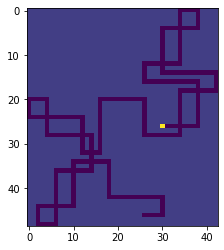

In [7]:
view.plot_image

In [8]:
# Solve puzzle
view.intersection_checksum

4044

## Challenge Part 2

```text
--- Part Two ---

Now for the tricky part: notifying all the other robots about the solar flare. The vacuum robot can do this automatically if it gets into range of a robot. However, you can't see the other robots on the camera, so you need to be thorough instead: you need to make the vacuum robot visit every part of the scaffold at least once.

The vacuum robot normally wanders randomly, but there isn't time for that today. Instead, you can override its movement logic with new rules.

Force the vacuum robot to wake up by changing the value in your ASCII program at address 0 from 1 to 2. When you do this, you will be automatically prompted for the new movement rules that the vacuum robot should use. The ASCII program will use input instructions to receive them, but they need to be provided as ASCII code; end each line of logic with a single newline, ASCII code 10.

First, you will be prompted for the main movement routine. The main routine may only call the movement functions: A, B, or C. Supply the movement functions to use as ASCII text, separating them with commas (,, ASCII code 44), and ending the list with a newline (ASCII code 10). For example, to call A twice, then alternate between B and C three times, provide the string A,A,B,C,B,C,B,C and then a newline.

Then, you will be prompted for each movement function. Movement functions may use L to turn left, R to turn right, or a number to move forward that many units. Movement functions may not call other movement functions. Again, separate the actions with commas and end the list with a newline. For example, to move forward 10 units, turn left, move forward 8 units, turn right, and finally move forward 6 units, provide the string 10,L,8,R,6 and then a newline.

Finally, you will be asked whether you want to see a continuous video feed; provide either y or n and a newline. Enabling the continuous video feed can help you see what's going on, but it also requires a significant amount of processing power, and may even cause your Intcode computer to overheat.

Due to the limited amount of memory in the vacuum robot, the ASCII definitions of the main routine and the movement functions may each contain at most 20 characters, not counting the newline.

For example, consider the following camera feed:

#######...#####
#.....#...#...#
#.....#...#...#
......#...#...#
......#...###.#
......#.....#.#
^########...#.#
......#.#...#.#
......#########
........#...#..
....#########..
....#...#......
....#...#......
....#...#......
....#####......

In order for the vacuum robot to visit every part of the scaffold at least once, one path it could take is:

R,8,R,8,R,4,R,4,R,8,L,6,L,2,R,4,R,4,R,8,R,8,R,8,L,6,L,2

Without the memory limit, you could just supply this whole string to function A and have the main routine call A once. However, you'll need to split it into smaller parts.

One approach is:

    Main routine: A,B,C,B,A,C
    (ASCII input: 65, 44, 66, 44, 67, 44, 66, 44, 65, 44, 67, 10)
    Function A:   R,8,R,8
    (ASCII input: 82, 44, 56, 44, 82, 44, 56, 10)
    Function B:   R,4,R,4,R,8
    (ASCII input: 82, 44, 52, 44, 82, 44, 52, 44, 82, 44, 56, 10)
    Function C:   L,6,L,2
    (ASCII input: 76, 44, 54, 44, 76, 44, 50, 10)

Visually, this would break the desired path into the following parts:

A,        B,            C,        B,            A,        C
R,8,R,8,  R,4,R,4,R,8,  L,6,L,2,  R,4,R,4,R,8,  R,8,R,8,  L,6,L,2

CCCCCCA...BBBBB
C.....A...B...B
C.....A...B...B
......A...B...B
......A...CCC.B
......A.....C.B
^AAAAAAAA...C.B
......A.A...C.B
......AAAAAA#AB
........A...C..
....BBBB#BBBB..
....B...A......
....B...A......
....B...A......
....BBBBA......

Of course, the scaffolding outside your ship is much more complex.

As the vacuum robot finds other robots and notifies them of the impending solar flare, it also can't help but leave them squeaky clean, collecting any space dust it finds. Once it finishes the programmed set of movements, assuming it hasn't drifted off into space, the cleaning robot will return to its docking station and report the amount of space dust it collected as a large, non-ASCII value in a single output instruction.

After visiting every part of the scaffold at least once, how much dust does the vacuum robot report it has collected?
```

In [9]:
# Route identified by eye
route = """
R,8,L,10,L,12,R,4,
R,8,L,12,R,4,R,4,
R,8,L,10,L,12,R,4,
R,8,L,10,R,8,
R,8,L,10,L,12,R,4,
R,8,L,12,R,4,R,4,
R,8,L,10,R,8,
R,8,L,12,R,4,R,4,
R,8,L,10,R,8,
R,8,L,12,R,4,R,4
"""

# Functions
funcA = "R,8,L,10,L,12,R,4"
funcB = "R,8,L,12,R,4,R,4"
funcC = "R,8,L,10,R,8"

# Order of functions
main = "A,B,A,C,A,B,C,B,C,B"

In [10]:
# Convert main to ASCII
main_asc = [ord(_) for _ in main] + [10]

# Convert functions to ASCII
funcA_asc = [ord(_) for _ in funcA] + [10]
funcB_asc = [ord(_) for _ in funcB] + [10]
funcC_asc = [ord(_) for _ in funcC] + [10]

# We don't want a feed
feed_asc = [ord("n"), 10]

# Define input program
inputs = main_asc + funcA_asc + funcB_asc + funcC_asc + feed_asc

In [11]:
# Wake vacuum robot and run
view = View(program, memsize=4000)
view.poke(0, 2)
view.run(inputs)

893283